## Setup

In [1]:
import nltk
nltk.download("book")
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Analyzing Text

In [2]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [3]:
print(len(text1))

260819


## Measure of Lexical Richness of a text:

$$R_1=\frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}} {\text{longitud del text}}$$

In [4]:
# Create the list of different words in the text1
vocabulary = sorted(set(text1))
print(vocabulary[100:150])

['128', '129', '13', '130', '131', '132', '133', '134', '135', '14', '144', '1492', '15', '150', '15th', '16', '1652', '1668', '1671', '1690', '1695', '16th', '17', '1726', '1729', '1750', '1772', '1775', '1776', '1778', '1779', '1788', '1791', '1793', '18', '180', '1807', '1819', '1820', '1821', '1825', '1828', '1833', '1836', '1839', '1840', '1842', '1846', '1850', '1851']


In [5]:
rl = len(vocabulary) / len(text1)
print(rl)

0.07406285585022564


In [6]:
def lexical_richness(text):
    vocabulary = sorted(set(text))
    return len(vocabulary) / len(text)

In [7]:
rl = lexical_richness(text1)
print(rl)

0.07406285585022564


In [8]:
def percentage_word(word, text):
    return (text.count(word) / len(text)) * 100

In [9]:
per_monster = percentage_word("whale", text1)
print(per_monster)

0.3473673313677301


### Language Statistics

In [14]:
word_counting = {}

for word in set(text1):
    word_counting[word] = text1.count(word)


## NLTK FreqDist

In [11]:
fdist = FreqDist(text1)
print(fdist.most_common(20))

[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632)]


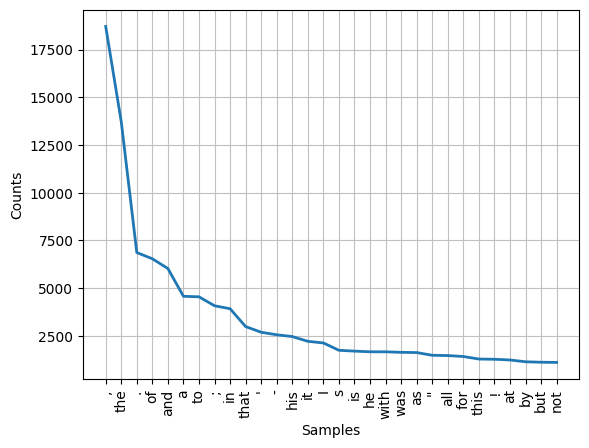

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [12]:
fdist.plot(30)

In [13]:
fdist["whale"]

906

## Fine Filter

In [20]:
long_words = [word for word in text1 if len(word) >= 4]
filtered_vocab = sorted(set(long_words))
filtered_vocab[:10]

['!"--',
 '!--"',
 "!--'",
 '"...',
 "',--",
 ').--',
 ');--',
 ',"--',
 ",'--",
 ',--"']

In [22]:
filtered_fdist = [(word, fdist[word]) for word in set(text1) if len(word) >= 4 and fdist[word] > 10]
dtypes = [("word", "S10"), ("frequency", int)]
filtered_fdist = np.array(filtered_fdist, dtype=dtypes)

In [24]:
filtered_fdist = np.sort(filtered_fdist, order='frequency')
filtered_fdist

array([(b'America',   11), (b'Didn',   11), (b'Father',   11), ...,
       (b'this', 1280), (b'with', 1659), (b'that', 2982)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

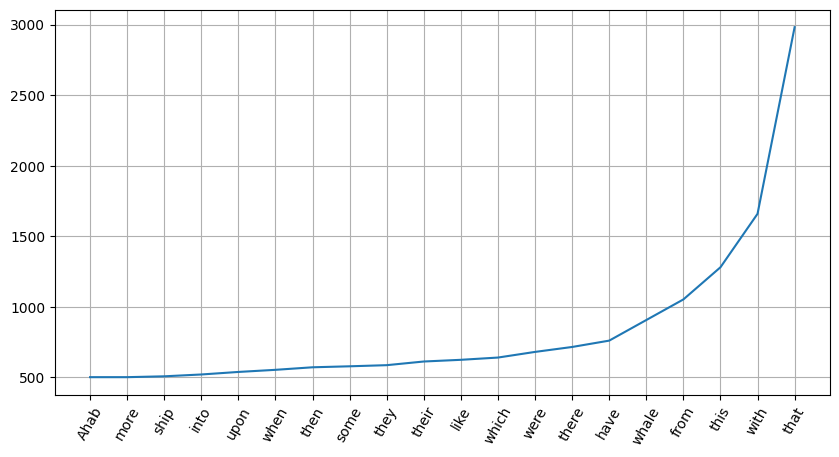

In [28]:
top_words = 20
x = [word[0] for word in filtered_fdist[-top_words:]]
y = [word[1] for word in filtered_fdist[-top_words:]]
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(rotation=60)
plt.grid(True)
plt.show()